In [31]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [32]:

def read_gff(file_path):
    table_gff = pd.read_csv(file_path, skiprows=[0], sep='\t', names=["chromosome",
                            "source",
                            "type",
                            "start",
                            "end",
                            "score",
                            "strand",
                            "phase",
                            "attributes"])
    
    return table_gff


def read_bed6(file_path):
    table_bed6 = pd.read_csv(file_path, sep='\t', names=["chromosome",
                            "start",
                            "end",
                            "name",
                            "score",
                            "strand"])
    return table_bed6



In [33]:
read_bed6('/content/alignment.bed')

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [34]:
read_gff('/content/rrna_annotation.gff')

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [35]:
table_gff = read_gff('/content/rrna_annotation.gff')

In [36]:
att = table_gff.attributes
print(att)

0      Name=16S_rRNA;product=16S ribosomal RNA
1      Name=23S_rRNA;product=23S ribosomal RNA
2      Name=16S_rRNA;product=16S ribosomal RNA
3      Name=23S_rRNA;product=23S ribosomal RNA
4      Name=23S_rRNA;product=23S ribosomal RNA
                        ...                   
343    Name=23S_rRNA;product=23S ribosomal RNA
344      Name=5S_rRNA;product=5S ribosomal RNA
345      Name=5S_rRNA;product=5S ribosomal RNA
346    Name=23S_rRNA;product=23S ribosomal RNA
347    Name=16S_rRNA;product=16S ribosomal RNA
Name: attributes, Length: 348, dtype: object


In [37]:
table_gff.attributes = table_gff['attributes'].apply(lambda x : x[5:].split('_')[0])

In [38]:
table_gff

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [39]:
n = table_gff.groupby(['chromosome','attributes']).agg('size').reset_index()

Text(0.5, 0, 'Sequence')

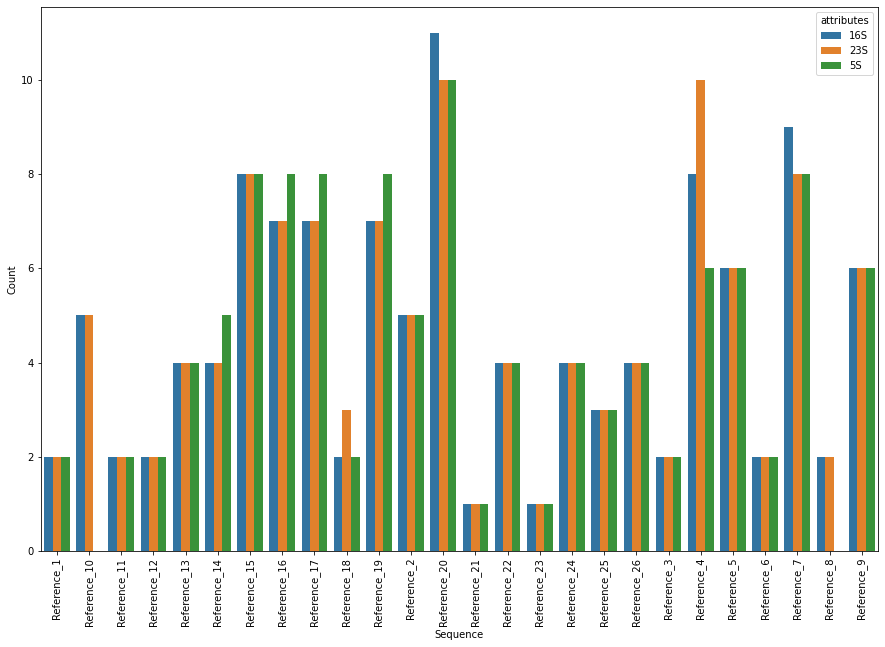

In [40]:
plt.figure(figsize = (15, 10)) 
plt.xticks(rotation= 90)
sns.barplot(data=n, x="chromosome", y = 0, hue='attributes')
plt.ylabel('Count')
plt.xlabel('Sequence')

In [24]:
bed = read_bed6('/content/alignment.bed')

In [28]:
merge_tables = pd.merge(table_gff, bed, on='chromosome')

In [29]:
df = merge_tables.loc[merge_tables['start_x'] > merge_tables['start_y']]

In [30]:
merge_tables

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126743,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749069,3749300,NODE_15186_length_231_cov_783.727273,0,-
126744,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749245,3749677,NODE_5718_length_432_cov_495.000000,31,-
126745,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749622,3759983,NODE_952_length_10361_cov_185.048709,60,+
126746,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3759928,3761392,NODE_2106_length_1464_cov_409.744500,0,-


In [5]:
diffexpt = pd.read_csv('/content/diffexpr_data.tsv', sep= '\t')

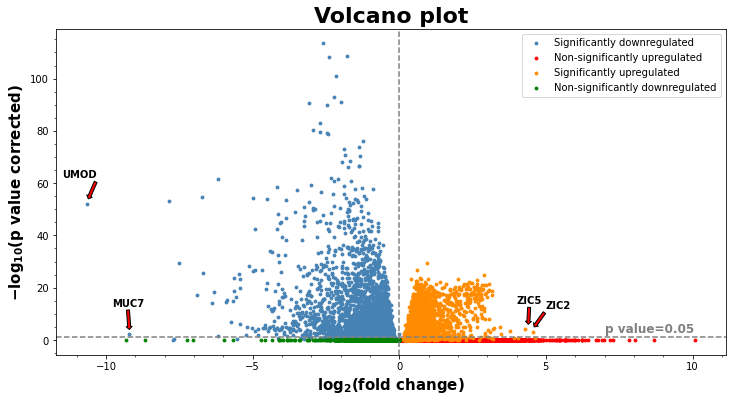

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
blue = diffexpt[(diffexpt['logFC'] <= 0) & (diffexpt['log_pval'] > 0.05)]
plt.scatter(blue['logFC'], blue['log_pval'], s=8,
            color='steelblue', label='Significantly downregulated')
red = diffexpt[(diffexpt['logFC'] > 0) & (diffexpt['log_pval'] < 0.05)]
plt.scatter(red['logFC'], red['log_pval'], s=8,
            color='red', label='Non-significantly upregulated')
darkorange = diffexpt[(diffexpt['logFC'] > 0) & (diffexpt['log_pval'] > 0.05)]
plt.scatter(darkorange['logFC'], darkorange['log_pval'], s=8,
            color='darkorange', label='Significantly upregulated')
green = diffexpt[(diffexpt['logFC'] <= 0) & (diffexpt['log_pval'] < 0.05)]
plt.scatter(green['logFC'], green['log_pval'], s=8,
            color='green', label='Non-significantly downregulated')
ax.set_xlabel(r'$\bf{log_{2}(fold \ change)}$',fontsize=15, fontweight= 'bold', )
ax.set_ylabel(r'$\bf{-log_{10}(p \ value \ corrected)}$',fontsize=15, fontweight= 'bold', )
ax.set_title('Volcano plot', size = 22, fontweight= 'bold')
plt.axvline(x = 0, linestyle='--', color='gray', linewidth=1.5)
plt.axhline(y= -np.log10(0.05), linestyle='--', color='gray', linewidth=1.5)
plt.text(7, 3, 'p value=0.05', weight='bold',  color='gray', fontsize=12)

ax.minorticks_on()
plt.annotate('UMOD', xy=(-10.6, 54), xytext=(-11.5, 62),fontweight='bold',
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))
plt.annotate('MUC7', xy=(-9.2, 4), xytext=(-9.8, 13), fontweight='bold', 
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))
plt.annotate('ZIC5', xy=(4.4, 6), xytext=(4, 14), fontweight='bold',
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))
plt.annotate('ZIC2', xy=(4.6, 5), xytext=(5, 12), fontweight='bold',
             arrowprops=dict(facecolor='red', width=3, headwidth=6, headlength=3))

ax.legend()